In [1]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")


# Load Data

In [3]:
# Load the dataset with error handling
try:
    df = pd.read_csv("../data/Chocolate Sales.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the path.")
except Exception as e:
    print(f"Error loading data: {e}")

# Check columns before cleaning
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y", errors="coerce")
else:
    print("'Date' column not found.")

if "Amount" in df.columns:
    df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)
else:
    print("'Amount' column not found.")

# Show 
df.head()

Data loaded successfully.


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


## 2: Understand the dataset structure

In [4]:
# General info
df.info()

# Check for missing values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [5]:
# Show summary statistics
display(df.describe())

,Date,Amount,Boxes Shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


# Understand the dataset

In [6]:
# Check the time range of data
print(df["Date"].min(), "→", df["Date"].max())


2022-01-03 00:00:00 → 2022-08-31 00:00:00


In [7]:
# Total sales and boxes shipped
print("Total Revenue: $", df["Amount"].sum())
print("Total Boxes Shipped:", df["Boxes Shipped"].sum())


Total Revenue: $ 6183625.0
Total Boxes Shipped: 177007


In [8]:
# Unique values per column (overview)
for col in ["Sales Person", "Country", "Product"]:
    print(f"{col}: {df[col].nunique()} unique")


Sales Person: 25 unique
Country: 6 unique
Product: 22 unique


# Plot Exploration


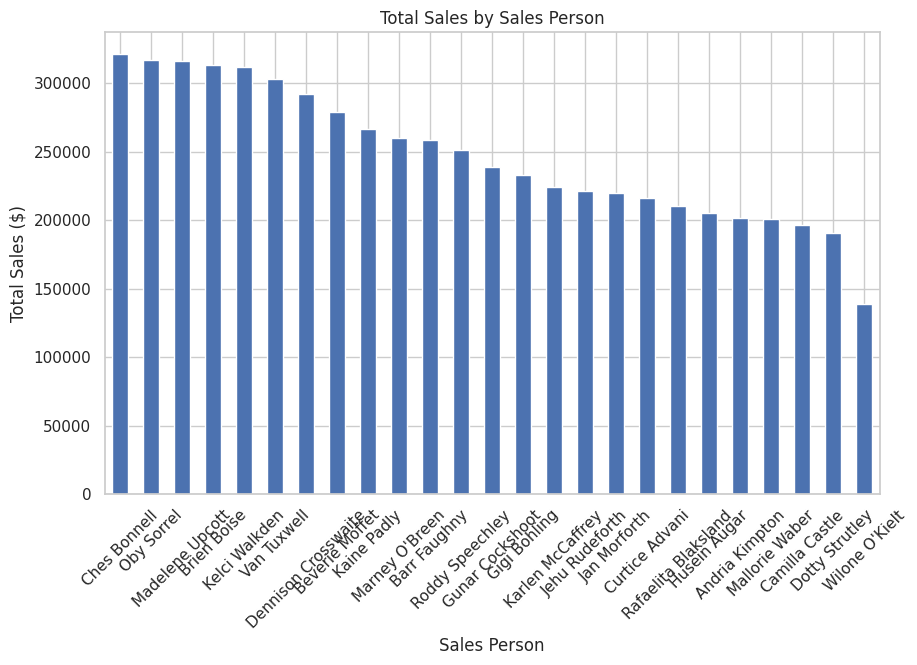

In [9]:
df.groupby("Sales Person")["Amount"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Total Sales by Sales Person")
plt.xlabel("Sales Person")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

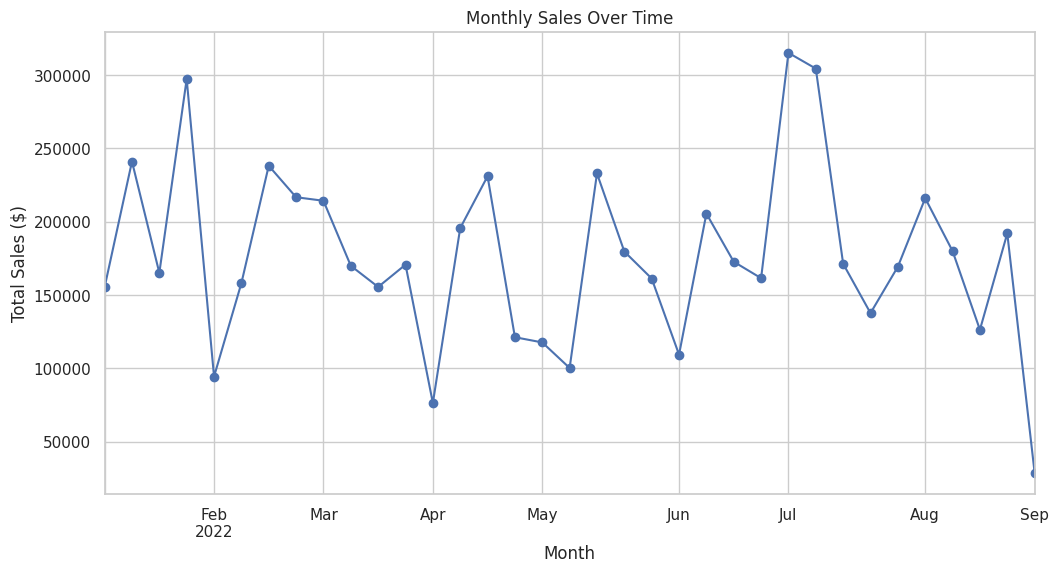

In [ ]:
# Group by week and sum sales
df_weekly = df.resample('W', on='Date')["Amount"].sum()

plt.figure(figsize=(12, 6))
df_weekly.plot(marker='o')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

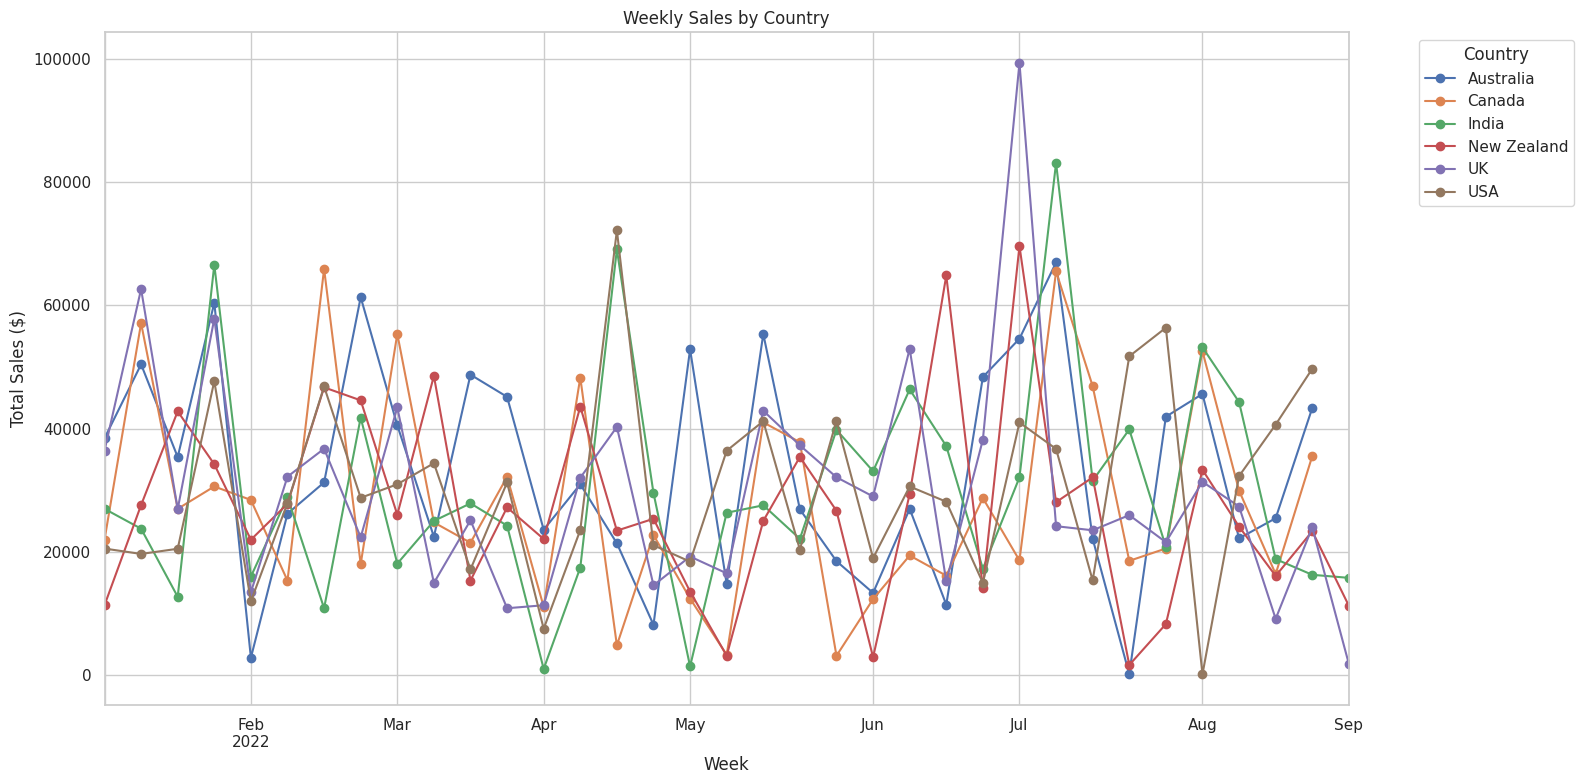

In [ ]:
# Group by week and country, then sum sales
weekly_country_sales = df.groupby([pd.Grouper(key="Date", freq="W"), "Country"])["Amount"].sum().unstack()

plt.figure(figsize=(16, 8))
weekly_country_sales.plot(ax=plt.gca(), marker='o')
plt.title("Weekly Sales by Country")
plt.xlabel("Week")
plt.ylabel("Total Sales ($)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

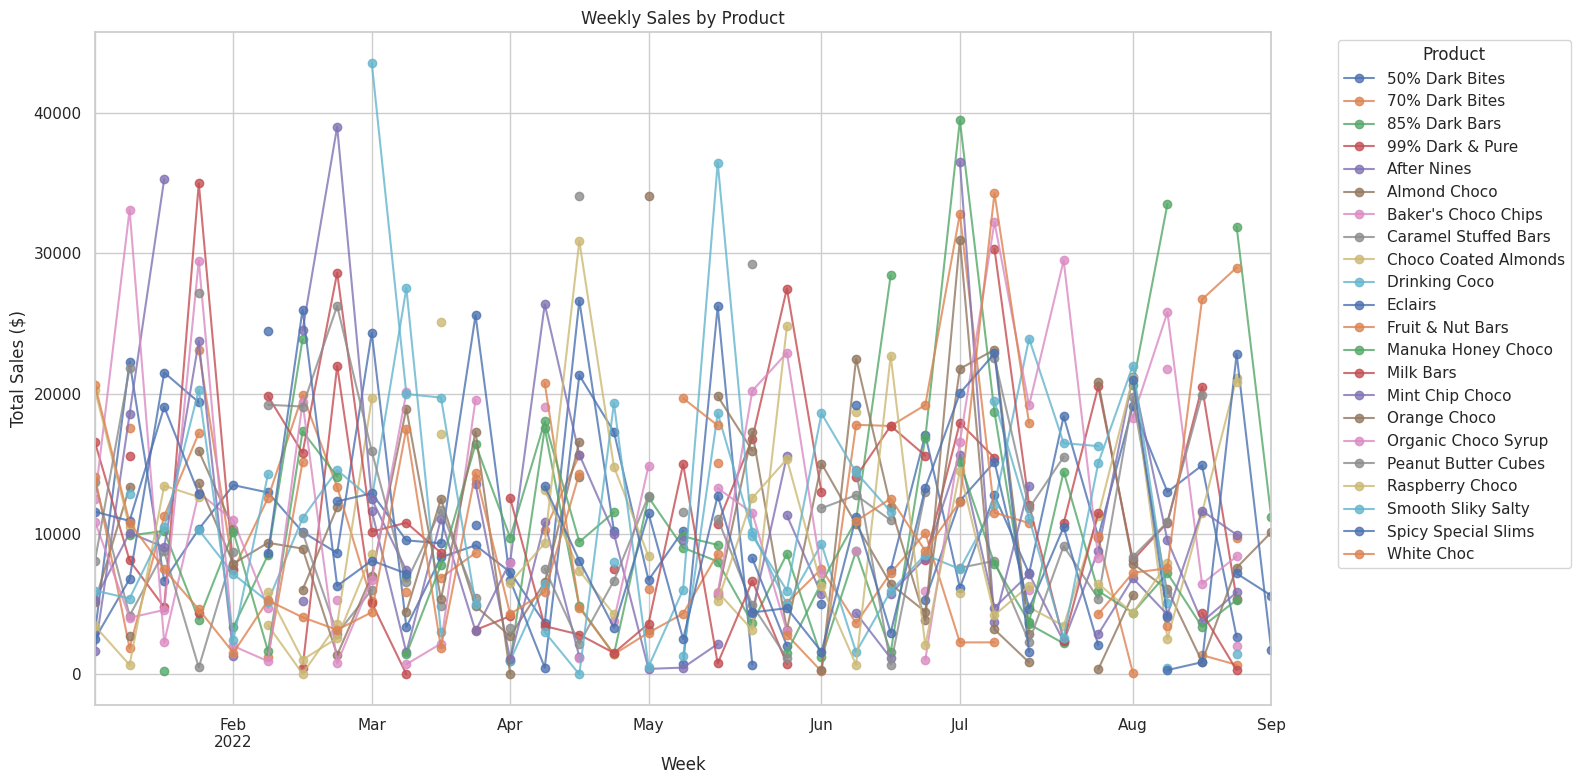

In [12]:
weekly_product_sales = df.groupby([pd.Grouper(key="Date", freq="W"), "Product"])["Amount"].sum().unstack()

plt.figure(figsize=(16, 8))
weekly_product_sales.plot(ax=plt.gca(), marker='o', alpha=0.8)
plt.title("Weekly Sales by Product")
plt.xlabel("Week")
plt.ylabel("Total Sales ($)")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


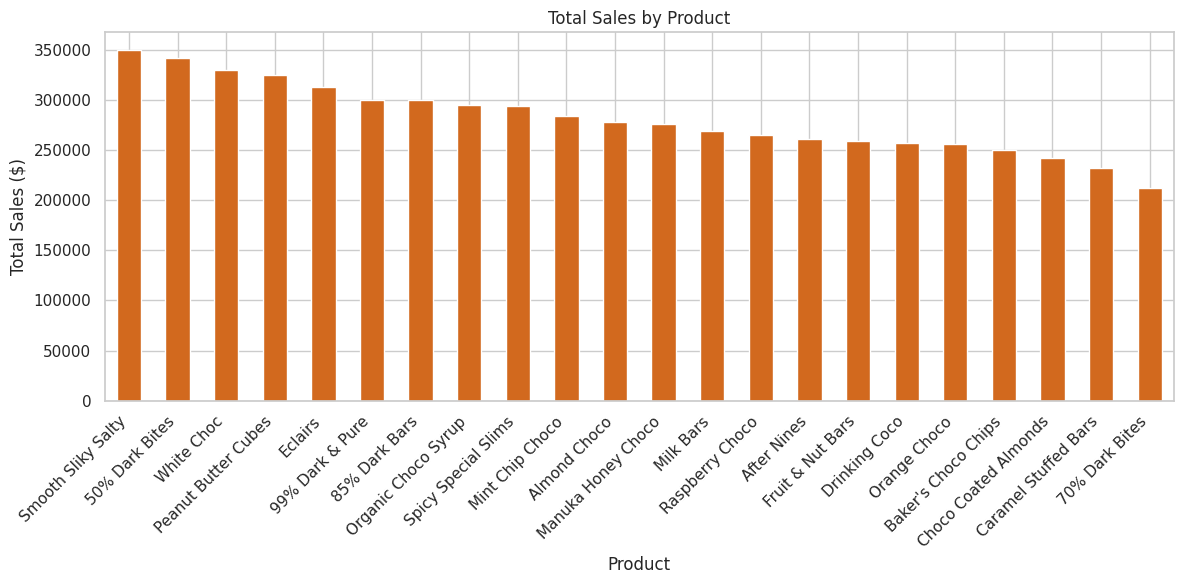

In [13]:
top_products = df.groupby("Product")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="chocolate")
plt.title("Total Sales by Product")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


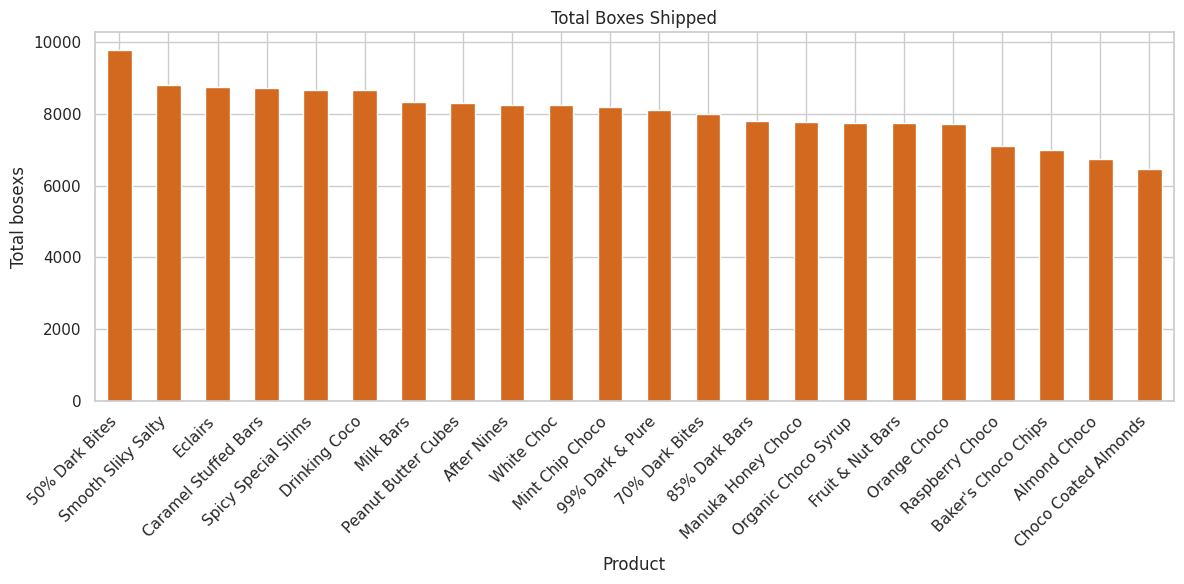

In [18]:
top_products = df.groupby("Product")["Boxes Shipped"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="chocolate")
plt.title("Total Boxes Shipped")
plt.ylabel("Total bosexs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

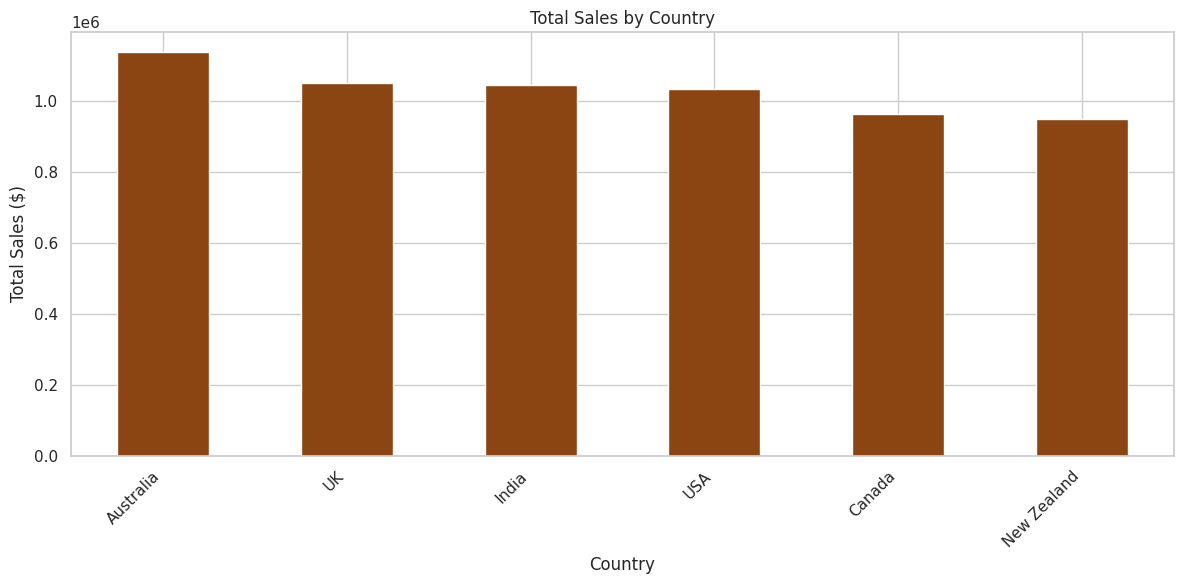

In [16]:
top_countries = df.groupby("Country")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_countries.plot(kind="bar", color="saddlebrown")
plt.title("Total Sales by Country")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Weekly sales by country

In [19]:
# Convert date column just in case
df['Date'] = pd.to_datetime(df['Date'])

# Group by week and country
weekly_country_sales = df.groupby([pd.Grouper(key='Date', freq='W'), 'Country'])['Amount'].sum().reset_index()

# Pivot to get time series format: one column per country
pivot_weekly_country = weekly_country_sales.pivot(index='Date', columns='Country', values='Amount')
pivot_weekly_country.head()


Country,Australia,Canada,India,New Zealand,UK,USA
Date,,,,,,
2022-01-09,38402.0,21910.0,26950.0,11277.0,36393.0,20496.0
2022-01-16,50428.0,57120.0,23723.0,27566.0,62657.0,19621.0
2022-01-23,35357.0,26950.0,12663.0,42791.0,26901.0,20461.0
2022-01-30,60438.0,30583.0,66612.0,34188.0,57855.0,47698.0
2022-02-06,2758.0,28392.0,15946.0,21931.0,13405.0,11935.0


# Plot the Weekly Sales by Country

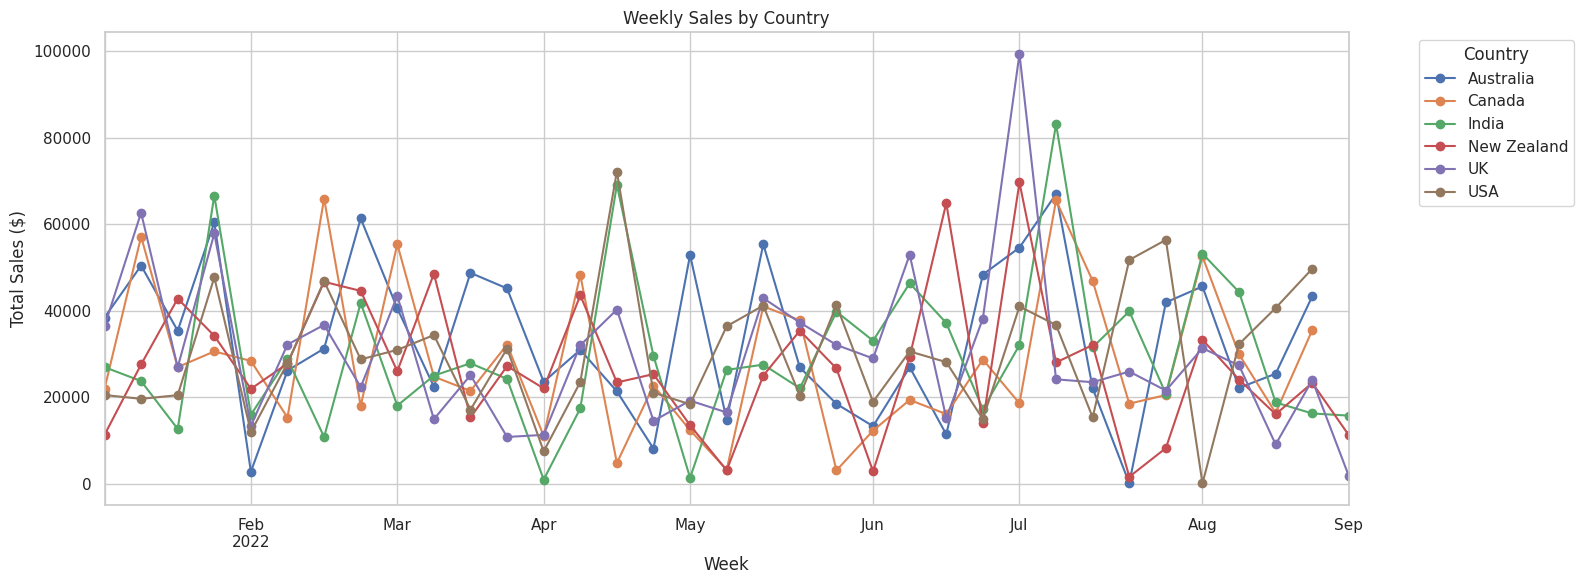

In [20]:
plt.figure(figsize=(16, 6))
pivot_weekly_country.plot(ax=plt.gca(), marker='o')
plt.title("Weekly Sales by Country")
plt.xlabel("Week")
plt.ylabel("Total Sales ($)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Forecast Weekly Sales for Australia

## Prepare the Data

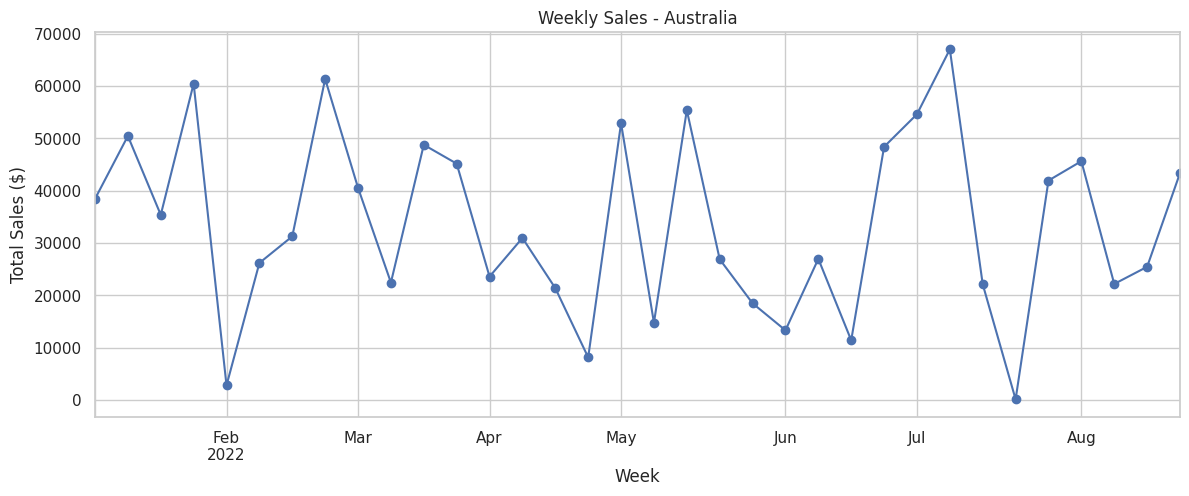

In [22]:
# Step 1: Filter for Australia
df_au = df[df["Country"] == "Australia"].copy()

# Step 2: Group by week
weekly_sales_au = df_au.groupby("Date")["Amount"].sum().resample("W").sum()

# Step 3: Plot to confirm
plt.figure(figsize=(14, 5))
weekly_sales_au.plot(marker='o')
plt.title("Weekly Sales - Australia")
plt.ylabel("Total Sales ($)")
plt.xlabel("Week")
plt.grid(True)
plt.show()


## Baseline moving average


### Convert and Group Weekly

In [23]:
# Make sure 'Date' is datetime
df_au['Date'] = pd.to_datetime(df_au['Date'])

# Set Date as index and resample weekly (Monday start)
weekly_sales_au = df_au.resample('W-MON', on='Date').sum().reset_index()

# Rename for clarity
weekly_sales_au.rename(columns={'Date': 'Week', 'Total Sales ($)': 'Total_Sales'}, inplace=True)
 

### Compute 4-Week Moving Average

In [25]:
# Sort by week
weekly_sales_au = weekly_sales_au.sort_values('Week')

# Add 4-week moving average
weekly_sales_au['4W_MA'] = weekly_sales_au['Amount'].rolling(window=4).mean()


In [30]:
weekly_sales_au.head()

,Week,Sales Person,Country,Product,Amount,Boxes Shipped,4W_MA
0,2022-01-03,Marney O'Breen,Australia,Smooth Sliky Salty,3745.0,170,NaN
1,2022-01-10,Brien BoiseWilone O'KieltMadelene UpcottKarlen...,AustraliaAustraliaAustraliaAustraliaAustraliaA...,Baker's Choco ChipsSmooth Sliky SaltyFruit & N...,41720.0,619,NaN
2,2022-01-17,Dennison CrosswaiteKaine PadlyChes BonnellMarn...,AustraliaAustraliaAustraliaAustraliaAustraliaA...,Baker's Choco ChipsManuka Honey Choco70% Dark ...,67137.0,3357,NaN
3,2022-01-24,Camilla CastleRafaelita Blaksland,AustraliaAustralia,99% Dark & PureRaspberry Choco,11585.0,360,31046.75
4,2022-01-31,Gunar CockshootBeverie MoffetWilone O'KieltGig...,AustraliaAustraliaAustraliaAustraliaAustraliaA...,Almond ChocoSmooth Sliky SaltyBaker's Choco Ch...,63196.0,1943,45909.50


In [29]:
import plotly.graph_objects as go


fig = go.Figure()

# Weekly Sales
fig.add_trace(go.Scatter(
    x=weekly_sales_au['Week'],
    y=weekly_sales_au['Amount'],
    mode='lines+markers',
    name='Weekly Sales'
))

# 4-week Moving Average
fig.add_trace(go.Scatter(
    x=weekly_sales_au['Week'],
    y=weekly_sales_au['4W_MA'],
    mode='lines',
    name='4W Moving Average',
    line=dict(color='orange', width=3)
))

fig.update_layout(
    title='Weekly Sales and 4-Week Moving Average - Australia',
    xaxis_title='Week',
    yaxis_title='Total Sales ($)',
    template='plotly_white'
)

fig.show()